In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D
# import time
import pickle
import random
import time

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive


from rebergrammar_generator import *
from experimentor import Experimentor

import os
os.getcwd()

# np.set_printoptions(threshold=sys.maxsize)

'/home/thabib/Documents/Personal/Master_Thesis/1_HTMImplementation'

### Param Settings

In [2]:
# Network params
M = 8
N = 175
k = 25

perm_decrement = 0.05 # p-
perm_increment = 2*perm_decrement # p+
perm_decay = 0.2*perm_decrement # p--
perm_boost = 0.1*perm_decrement # p++

# Cell params
dendrites_percell = 32
connSynapses_perdend = 32 # not functional, at the moment
nmda_threshold = 20
permanence_threshold = 0.40
init_permanence = 0.25
activity_horizon = None
activity_threshold = None

# Task params
do_ERG = False
nof_strings = 5000

### Experiment Initializer and Launcher

In [3]:
start = time.time()

exp = Experimentor(M=M, N=N, k=k, n_dendrites=dendrites_percell, n_synapses=connSynapses_perdend, 
                   nmda_th=nmda_threshold, perm_th=permanence_threshold, perm_init=init_permanence, 
                   perm_decrement=perm_decrement, perm_increment=perm_increment, 
                   perm_decay=perm_decay, perm_boost=perm_boost,
                   activity_horizon=activity_horizon, activity_th=activity_threshold,
                   do_ERG=do_ERG, nof_strings=nof_strings)

In [4]:
dict_results = exp.run_experiment()

print(time.time()-start)

# 3606 secs for 1000 strings
# 19374 secs for 5000 strings

19374.014357805252


#### Writing Files

In [5]:
if do_ERG:
    result_file = 'Res_ERG_'+str(nof_strings)
    charsMC_file = 'CharsToMC_ERG_'+str(nof_strings)
else:
    result_file = 'Res_SRG_'+str(nof_strings)
    charsMC_file = 'CharsToMC_SRG_'+str(nof_strings)
    
with open(result_file+'.pickle', 'wb') as f:
    pickle.dump(dict_results['results'], f)


with open(charsMC_file+'.pickle', 'wb') as f:
    pickle.dump(dict_results['chars_to_minicols'], f)

# Analysis of Results

#### Loading Files

In [6]:
if do_ERG:
    result_file = 'Res_ERG_'+str(nof_strings)
    charsMC_file = 'CharsToMC_ERG_'+str(nof_strings)
else:
    result_file = 'Res_SRG_'+str(nof_strings)
    charsMC_file = 'CharsToMC_SRG_'+str(nof_strings)

    
with open(result_file+'.pickle', 'rb') as f:
    results = pickle.load(f)

with open(charsMC_file+'.pickle', 'rb') as f:
    charsMC = pickle.load(f)

In [7]:
results

,htm_states,htm_preds,htm_preds_dend,htm_networks
reber_string,,,,
APVTSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
APVTPXVSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
ATXXVSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
APVTPXVTTSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
ATXXVSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
...,...,...,...,...
APVTTPXVSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
ATXXVPXVTTSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...
APVTSZ,"[[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, [25], na...",[[[<htm_cell.HTM_CELL object at 0x7fe49728c850...


In [11]:
charsMC

,A,T,S,X,P,V,Z
0,3,6,16,0,7,2,11
1,4,8,22,1,10,15,12
2,5,17,23,27,13,18,19
3,9,50,31,30,14,29,21
4,25,55,33,37,20,34,24
5,26,63,46,40,28,35,36
6,43,64,60,47,32,38,39
7,44,70,61,59,48,41,42
8,45,71,62,78,66,51,49
9,58,74,65,82,69,52,53


In [8]:
in_strings_onehot = dict_results['in_strings_onehot']
out_strings_onehot = dict_results['out_strings_onehot']

In [106]:
# Generating xticks for plots based on characters-minicols

xticks_plot = np.empty(N, dtype=object)
for ch in chars:
    xticks_plot[charsMC[ch]] = ch
    
xticks_plot

array(['X', 'X', 'V', 'A', 'A', 'A', 'T', 'P', 'T', 'A', 'P', 'Z', 'Z',
       'P', 'P', 'V', 'S', 'T', 'V', 'Z', 'P', 'Z', 'S', 'S', 'Z', 'A',
       'A', 'X', 'P', 'V', 'X', 'S', 'P', 'S', 'V', 'V', 'Z', 'X', 'V',
       'Z', 'X', 'V', 'Z', 'A', 'A', 'A', 'S', 'X', 'P', 'Z', 'T', 'V',
       'V', 'Z', 'V', 'T', 'V', 'Z', 'A', 'X', 'S', 'S', 'S', 'T', 'T',
       'S', 'P', 'V', 'V', 'P', 'T', 'T', 'S', 'A', 'T', 'P', 'A', 'T',
       'X', 'P', 'A', 'Z', 'X', 'X', 'V', 'V', 'X', 'V', 'S', 'A', 'X',
       'V', 'S', 'T', 'A', 'X', 'T', 'Z', 'S', 'S', 'V', 'T', 'X', 'S',
       'X', 'P', 'X', 'T', 'S', 'Z', 'X', 'P', 'A', 'Z', 'Z', 'Z', 'T',
       'V', 'X', 'Z', 'A', 'X', 'Z', 'A', 'A', 'A', 'V', 'P', 'S', 'S',
       'Z', 'P', 'P', 'T', 'S', 'S', 'Z', 'T', 'V', 'P', 'X', 'Z', 'V',
       'A', 'P', 'A', 'T', 'T', 'T', 'Z', 'A', 'P', 'T', 'A', 'T', 'P',
       'V', 'S', 'A', 'T', 'P', 'V', 'X', 'Z', 'X', 'S', 'T', 'P', 'X',
       'P', 'S', 'Z', 'X', 'P', 'S'], dtype=object)

## 1. Input String Statistics

In [9]:
# NOF UNIQUE Reber strings
len(np.unique(exp.in_strings_alpha))

361

In [10]:
# NOF STRINGS with a given context

context = 'AT'
sum([i.startswith(context) for i in exp.in_strings_alpha])

2653

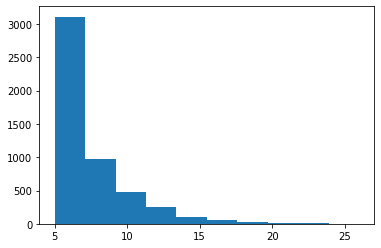

Average Length of the string:  7.5036


In [13]:
len_rg_exs = []

for ex in in_strings_onehot:
    len_rg_exs.append(len(ex))

plt.figure()
plt.hist(len_rg_exs)
plt.show()

print('Average Length of the string: ', np.mean(len_rg_exs))

## 2. Net Cell Activity & Predictivity

In [40]:
in_strings_alpha = [s for s in list(results.index)]
#len(in_strings_alpha)

### Computing Network's Total Cell Activity

In [120]:
%matplotlib notebook

<IPython.core.display.Javascript object>


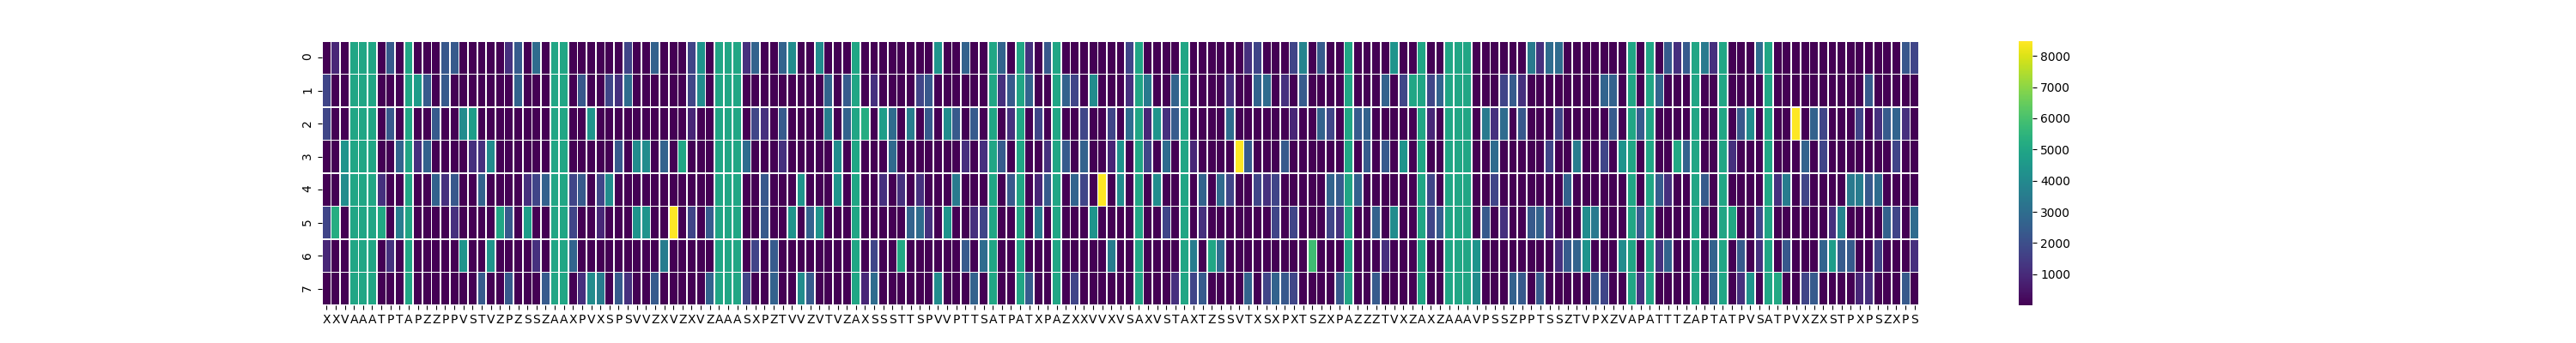

In [131]:
cell_activity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_activity += sum(results.iloc[string_idx]['htm_states']) # RHS sums up the net cellular activity 
                                                                 # for each letter of the string.
        
plt.figure(figsize=(30,4))
activity = sns.heatmap(cell_activity, linewidth=0.5, cmap='viridis', xticklabels=xticks_plot)
activity.set_xticklabels(labels=xticks_plot, rotation=0)
plt.show()

### Total Cell Activity – Character-wise

<IPython.core.display.Javascript object>


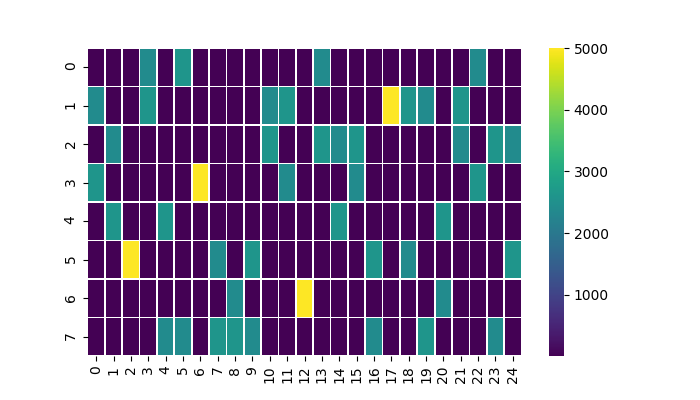

array([[   6.,    6.,    6., 2388.,    6., 2618.,    6.,    6.,    6.,
           6.,    6.,    6.,    6., 2388.,    6.,    6.,    6.,    6.,
           6.,    6.,    6.,    6., 2388.,    6.,    6.],
       [2388.,    6.,    6., 2618.,    6.,    6.,    6.,    6.,    6.,
           6., 2388., 2618.,    6.,    6.,    6.,    6.,    6., 5000.,
        2618., 2388.,    6., 2618.,    6.,    6.,    6.],
       [   6., 2388.,    6.,    6.,    6.,    6.,    6.,    6.,    6.,
           6., 2618.,    6.,    6., 2618., 2388., 2618.,    6.,    6.,
           6.,    6.,    6., 2388.,    6., 2618., 2388.],
       [2618.,    6.,    6.,    6.,    6.,    6., 5000.,    6.,    6.,
           6.,    6., 2388.,    6.,    6.,    6., 2388.,    6.,    6.,
           6.,    6.,    6.,    6., 2618.,    6.,    6.],
       [   6., 2618.,    6.,    6., 2618.,    6.,    6.,    6.,    6.,
           6.,    6.,    6.,    6.,    6., 2618.,    6.,    6.,    6.,
           6.,    6., 2618.,    6.,    6.,    6.,    6.],


In [150]:
char = 'Z'
char_activity = cell_activity[:,list(charsMC[char])]

plt.figure(figsize=(7,4))
ch_activity = sns.heatmap(char_activity, linewidth=0.5, cmap='viridis')
plt.show()

char_activity

### Computing Total Cell Predicitivity

<IPython.core.display.Javascript object>


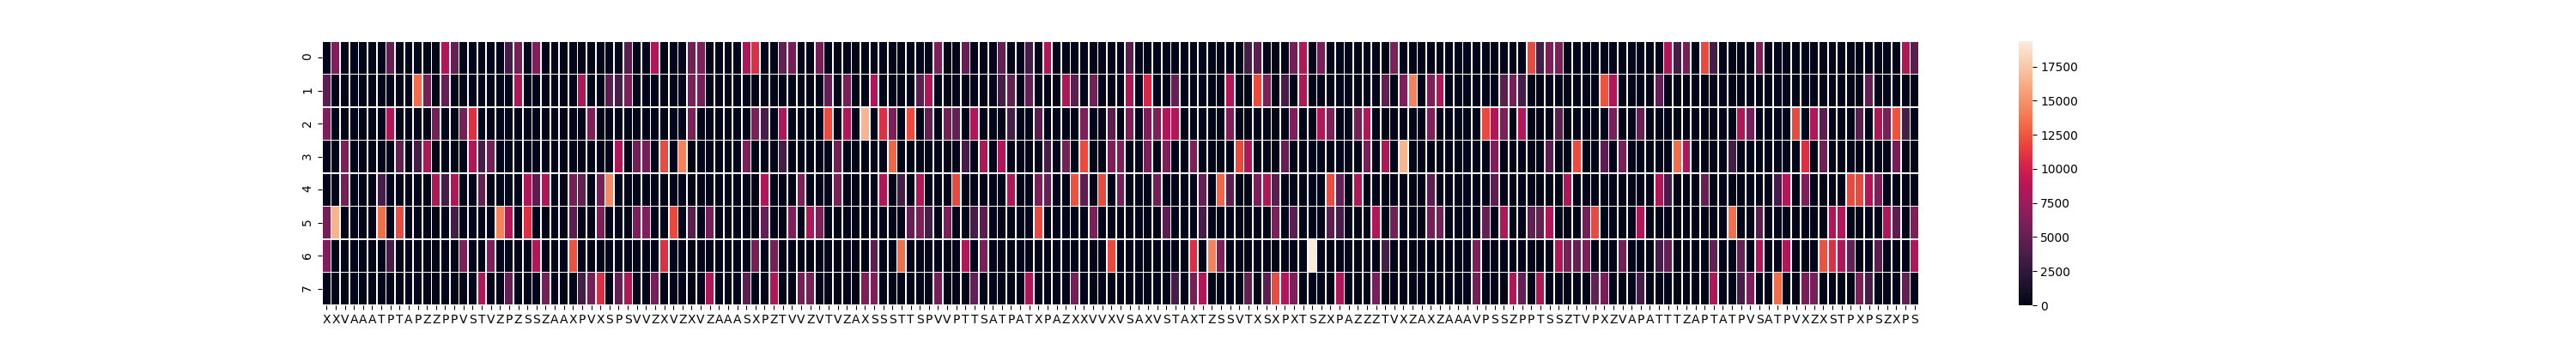

In [143]:
cell_predictivity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_predictivity += sum(results.iloc[string_idx]['htm_preds'])
        
plt.figure(figsize=(30,4))
predictivity = sns.heatmap(cell_predictivity, linewidth=0.5, xticklabels=xticks_plot)
predictivity.set_xticklabels(labels=xticks_plot, rotation=0)
plt.show()

<IPython.core.display.Javascript object>


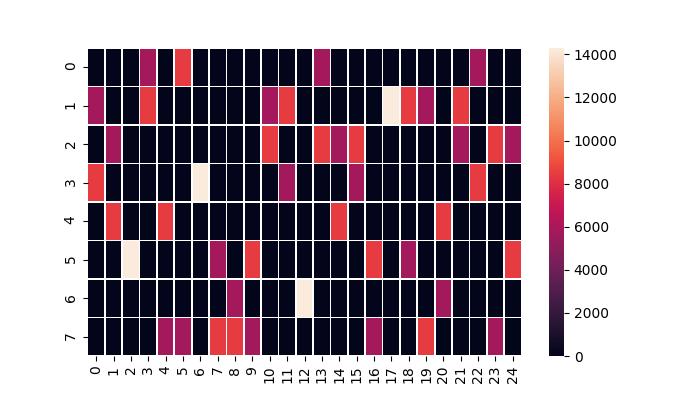

array([[    0.,     0.,     0.,  5840.,     0.,  8454.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  5840.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,  5840.,     0.,
            0.],
       [ 5840.,     0.,     0.,  8454.,     0.,     0.,     0.,     0.,
            0.,     0.,  5840.,  8454.,     0.,     0.,     0.,     0.,
            0., 14294.,  8454.,  5840.,     0.,  8454.,     0.,     0.,
            0.],
       [    0.,  5840.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,  8454.,     0.,     0.,  8454.,  5840.,  8454.,
            0.,     0.,     0.,     0.,     0.,  5840.,     0.,  8454.,
         5840.],
       [ 8454.,     0.,     0.,     0.,     0.,     0., 14294.,     0.,
            0.,     0.,     0.,  5840.,     0.,     0.,     0.,  5840.,
            0.,     0.,     0.,     0.,     0.,     0.,  8454.,     0.,
            0.],
       [    0.,  8454.,     0.,     0.,  8454.,     0.,     0.,     

In [151]:
char = 'Z'
char_predictivity = cell_predictivity[:,list(charsMC[char])]

plt.figure(figsize=(7,4))
ch_predictivity = sns.heatmap(char_predictivity, linewidth=0.5)
plt.show()

char_predictivity

## 3. Measuring Performance

In [136]:
cell_activity[:,[1,2]]

array([[9.270e+02, 4.000e+00],
       [9.000e+00, 4.000e+00],
       [9.000e+00, 4.000e+00],
       [9.000e+00, 4.382e+03],
       [9.000e+00, 4.093e+03],
       [5.243e+03, 4.000e+00],
       [9.000e+00, 4.000e+00],
       [9.000e+00, 4.000e+00]])

In [56]:
#np.shape(results.iloc[0]['htm_states'])

sum(results.iloc[1]['htm_states'])

array([[1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       ...,
       [1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.]])

In [57]:
np.shape(sum(results.iloc[1]['htm_states']))

(8, 175)

In [ ]:
for i in nof_strings:
    
    